<a href="https://colab.research.google.com/github/octagm/ia_2024/blob/Extraccion_datos_I/Preparacion_de_los_Datos_OGM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Actividad 4 - Preparación de los Datos </h1>

---
<h2> Extracción de Datos I </h2>
<h2> Realizado Por: Estudiante Octavio Guerra M </h2>
<h2> Fecha: Septiembre 30 - 2024 </h2>

---
<h3> Versión: 1.0 </h3>





# Descripcion del Conjunto de Datos

El conjunto de datos que analizaremos corresponde a uno tomado de Kaggle, denominado "Domestic Violence in Colombia" (Violencia Domestica en Colombia). Como el conjunto de datos incluye casi 500 mil registros. Decidi tomar solo los 5 mil primeros registros para el analisis univariado.

Estos datos fueron tomados entre los años 2010 a 2021.

El enlace al conjunto de datos es el siguiente:
https://www.kaggle.com/datasets/oscardavidperilla/domestic-violence-in-colombia/code

In [135]:
# Iniciamos importando las librería requeridas

import pandas as pd                              # Librería Pandas para realizar Análisis y Manipulación de Datos
from sklearn.preprocessing import LabelEncoder   # Librería paa realizar cambio de Variables Categóricas a Numéricas
import matplotlib.pyplot as plt                  # Importación de la librería para graficado
import seaborn as sns                            # Importación de la librería para graficado
import numpy as np                               # Importación de la librería para algebra lineal y funciones matemáticas

In [136]:
# Cargamos el conjunto de datos que vamos a analizar. Recordemos que fue tomado de kaggle y corresponde

url = 'https://github.com/octagm/local_ia_2024/blob/main/Reporte_Delito_Violencia_Intrafamiliar_Polic_a_Nacional.csv?raw=true'
df = pd.read_csv(url)

# Analisis del conjunto de datos cargados

Revisemos de los datos cargados en el Dataframe lo general, para entenderlo:

1. Cuantas Columnas tiene y de que tipo.
2. Cambio a formato de fecha para tipos de datos que corresponda (FECHA HECHO).
2. Cuantos registros se cargaron (Nro. de Filas).
3. Primeros 10 registros del Conjunto de Datos.
4. Ultimos 10 registros del Conjunto de Datos.
5. Verificación de Datos Nulos
6. Verificación de Datos NaN

In [137]:
# 1. Revisemos los encabezados y el tipo de dato de cada columna en el conjunto de
# datos (dataset)
print(df.dtypes)

DEPARTAMENTO    object
MUNICIPIO       object
CODIGO DANE      int64
ARMAS MEDIOS    object
FECHA HECHO     object
GENERO          object
GRUPO ETARIO    object
CANTIDAD         int64
dtype: object


In [138]:
# Para un mejor manejo tomemoos la Columna Fecha Hecho que fue importado como Tipo Objecto y
# llevemosla a un formato tipo fecha.
# Usamos coerce para que aquellos valores que al convertir no sean validos los deje como NaN
df['FECHA HECHO'] = pd.to_datetime(df['FECHA HECHO'], format='%d/%m/%Y', errors="coerce")
print(df.dtypes)

DEPARTAMENTO            object
MUNICIPIO               object
CODIGO DANE              int64
ARMAS MEDIOS            object
FECHA HECHO     datetime64[ns]
GENERO                  object
GRUPO ETARIO            object
CANTIDAD                 int64
dtype: object


In [139]:
# Veamos cuantos registros tiene el conjunto de datos cargados.
print('Nro de registros:',f"{df.shape[0]:,}")

Nro de registros: 4,998


In [140]:
# Listemos los 10 primeros 10 registros del conjunto de datos (dataset)
df.head(10)

,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARIO,CANTIDAD
0,ATLÁNTICO,BARRANQUILLA (CT),8001000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,MASCULINO,ADULTOS,1
1,BOYACÁ,DUITAMA,15238000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,FEMENINO,ADULTOS,1
2,CAQUETÁ,PUERTO RICO,18592000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,MASCULINO,ADULTOS,1
3,CASANARE,MANÍ,85139000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,FEMENINO,ADULTOS,1
4,CUNDINAMARCA,BOGOTÁ D.C. (CT),11001000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,FEMENINO,ADULTOS,1
5,SUCRE,SINCELEJO (CT),70001000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,FEMENINO,ADULTOS,1
6,VALLE,CALI (CT),76001000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,FEMENINO,ADULTOS,2
7,VALLE,CALI (CT),76001000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,MASCULINO,ADULTOS,2
8,VALLE,TULUÁ,76834000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,FEMENINO,ADULTOS,1
9,HUILA,PITALITO,41551000,ARMA DE FUEGO,2010-01-01,FEMENINO,ADULTOS,1


In [141]:
# Listemos los 10 últimos registros del conjunto de datos (dataset)
df.tail(10)

,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARIO,CANTIDAD
4988,HUILA,LA PLATA,41396000,CONTUNDENTES,2010-04-17,MASCULINO,ADULTOS,1
4989,HUILA,NEIVA (CT),41001000,CONTUNDENTES,2010-04-17,FEMENINO,ADULTOS,3
4990,HUILA,NEIVA (CT),41001000,CONTUNDENTES,2010-04-17,MASCULINO,ADOLESCENTES,1
4991,MAGDALENA,SANTA MARTA (CT),47001000,CONTUNDENTES,2010-04-17,FEMENINO,ADULTOS,2
4992,META,GRANADA,50313000,CONTUNDENTES,2010-04-17,FEMENINO,ADULTOS,1
4993,META,VILLAVICENCIO (CT),50001000,CONTUNDENTES,2010-04-17,FEMENINO,ADULTOS,4
4994,META,VILLAVICENCIO (CT),50001000,CONTUNDENTES,2010-04-17,MASCULINO,ADULTOS,1
4995,NORTE DE SANTANDER,OCAÑA,54498000,CONTUNDENTES,2010-04-17,FEMENINO,ADULTOS,1
4996,NORTE DE SANTANDER,PAMPLONA,54518000,CONTUNDENTES,2010-04-17,FEMENINO,ADULTOS,1
4997,NORTE DE SANTANDER,PAMPLONA,54518000,CONTUNDENTES,2010-04-17,MASCULINO,ADULTOS,1


In [142]:
# Revisemos si hay datos Nulos
df.isnull().sum()

,0
DEPARTAMENTO,0
MUNICIPIO,0
CODIGO DANE,0
ARMAS MEDIOS,0
FECHA HECHO,0
GENERO,0
GRUPO ETARIO,0
CANTIDAD,0


**Nota 1** <br>
Podemos ver de la informacion mostrada en el comando df.isnull().sum(), no hay valores nulos en el conjunto de datos (dataset).

In [143]:
# Revisemos si hay datos NaN

df.isna().sum()


,0
DEPARTAMENTO,0
MUNICIPIO,0
CODIGO DANE,0
ARMAS MEDIOS,0
FECHA HECHO,0
GENERO,0
GRUPO ETARIO,0
CANTIDAD,0


**Nota 2**
<br>
Podemos Notar que no hay algun dato NaN en las columnas del dataframe en uso.

No tenemos nulos, ni tampoco NaN en el dataframe, esto es bueno, porque podemos
realizar ajustes, transformaciones y analisis sobre los datos en el dataframe.

# Iniciemos con la Preparación de los datos

En este punto tenemos identificado el conjunto de datos y sus componentes y del análisis inicial podemos ver que no hay datos Nulos, ni NaN.

Vamos a preparar los Datos para poder analizarlos en mayor profundidad, ver correlaciones entre variables, entre otras. Para hacerlo, vamos a aplicar:
- Label Encoding
- One Hot Encondig
- Normalization

In [144]:
# Revisemos cuantos departamentos tenemos en nuestro conjunto de datos (dataframe)

cantidad_departamentos = df['DEPARTAMENTO'].nunique()
print(f"cantidad de DEPARTAMENTOS en el Dataframe: {cantidad_departamentos}")

# Revisemos cuantos registros por DEPARTAMENTO tenemos

cantidad_por_departamento = df.groupby('DEPARTAMENTO')['DEPARTAMENTO'].count()
print('\n')
print(" Cantidad de Registros por DEPARTAMENTO en el Dataframe \n")
print(cantidad_por_departamento)


cantidad de DEPARTAMENTOS en el Dataframe: 31


 Cantidad de Registros por DEPARTAMENTO en el Dataframe 

DEPARTAMENTO
AMAZONAS               47
ANTIOQUIA             255
ARAUCA                 47
ATLÁNTICO             162
BOLÍVAR               165
BOYACÁ                497
CALDAS                142
CAQUETÁ                99
CASANARE              159
CAUCA                  17
CESAR                  97
CHOCÓ                   8
CUNDINAMARCA          463
CÓRDOBA                35
GUAINÍA                 1
GUAJIRA                65
GUAVIARE                5
HUILA                 203
MAGDALENA              86
META                  248
NARIÑO                119
NORTE DE SANTANDER    106
PUTUMAYO               61
QUINDÍO                39
RISARALDA             209
SANTANDER             543
SUCRE                 235
TOLIMA                 76
VALLE                 799
VAUPÉS                  2
VICHADA                 8
Name: DEPARTAMENTO, dtype: int64


In [145]:
# Revisemos cuantos Generos tenemos en nuestro conjunto de datos (dataframe)

num_generos = df['GENERO'].nunique()
print(f"Cantidad of GENEROS en el Dataframe: {num_generos}")

# Revisemos cuantos registros por GENERO tenemos.

cantidad_por_genero = df.groupby('GENERO')['GENERO'].count()
print('\n')
print(" Cantidad de Registros por GENERO en el Dataframe \n")
print(cantidad_por_genero)

Cantidad of GENEROS en el Dataframe: 3


 Cantidad de Registros por GENERO en el Dataframe 

GENERO
FEMENINO      3905
MASCULINO     1091
NO REPORTA       2
Name: GENERO, dtype: int64


In [146]:
# Cambiemos los dos (2) registros que aparecen como "NO REPORTA" en la columna
# GENERO a femenino, considerando que es el genero con mayor reporte de ataques
# de violencia en el Dataframe

df.loc[df['GENERO'] == 'NO REPORTA', 'GENERO'] = 'FEMENINO'

# Revisemos si ahora solo tenemos dos (2) tipos de GENERO en el Dataframe

num_generos = df['GENERO'].nunique()
print(f"Cantidad of GENEROS en el Dataframe: {num_generos}")


cantidad_por_genero = df.groupby('GENERO')['GENERO'].count()
print('\n')
print(" Cantidad de Registros por GENERO en el Dataframe \n")
print(cantidad_por_genero)

Cantidad of GENEROS en el Dataframe: 2


 Cantidad de Registros por GENERO en el Dataframe 

GENERO
FEMENINO     3907
MASCULINO    1091
Name: GENERO, dtype: int64


In [147]:
# Revisemos cuantos GRUPOS ETARIOS tenemos en nuestro conjunto de datos (dataframe)

num_etarios = df['GRUPO ETARIO'].nunique()
print(f"Cantidad of GRUPOS ETARIOS en el Dataframe: {num_etarios}")

# Revisemos cuantos registros por grupo ETARIO tenemos.

cantidad_por_etario = df.groupby('GRUPO ETARIO')['GRUPO ETARIO'].count()
print('\n')
print(" Cantidad de Registros por grupo ETARIO en el Dataframe \n")
print(cantidad_por_etario)

Cantidad of GRUPOS ETARIOS en el Dataframe: 4


 Cantidad de Registros por grupo ETARIO en el Dataframe 

GRUPO ETARIO
ADOLESCENTES     336
ADULTOS         4450
MENORES          210
NO REPORTA         2
Name: GRUPO ETARIO, dtype: int64


In [148]:
# Cambiemos los dos (2) registros que aparecen como "NO REPORTA" en la columna
# GRUPO ETARIO a ADULTO, considerando que es el genero con mayor reporte de ataques
# de violencia en el Dataframe

df.loc[df['GRUPO ETARIO'] == 'NO REPORTA', 'GRUPO ETARIO'] = 'ADULTOS'

# Revisemos si ahora solo tenemos tres (3) tipos de GRUPO ETARIO en el Dataframe

num_etarios = df['GRUPO ETARIO'].nunique()
print(f"Cantidad of GRUPOS ETARIOS en el Dataframe: {num_etarios}")


cantidad_por_etario = df.groupby('GRUPO ETARIO')['GRUPO ETARIO'].count()
print('\n')
print(" Cantidad de GRUPOS ETARIOS en el Dataframe \n")
print(cantidad_por_etario)

Cantidad of GRUPOS ETARIOS en el Dataframe: 3


 Cantidad de GRUPOS ETARIOS en el Dataframe 

GRUPO ETARIO
ADOLESCENTES     336
ADULTOS         4452
MENORES          210
Name: GRUPO ETARIO, dtype: int64


In [149]:
# Vamos a usar Label Enconder para convertir la columna
# categorica DEPARTAMENTOS a un valor numérico

# Creamos una instancia de label encoder
labenc = LabelEncoder()

# Apliquemos la conversión para la columna DEPARTAMENTO a un valor númerico

df['DEPARTAMENTO'] = labenc.fit_transform(df['DEPARTAMENTO'])

# Revisemos los resultados despues del cambio realizado a valor númerico
# para la columna DEPARTAMENTO
cantidad_por_departamento = df.groupby('DEPARTAMENTO')['DEPARTAMENTO'].count()
print('\n')
print(" Cantidad de Registros por DEPARTAMENTO en el Dataframe \n")
print(cantidad_por_departamento)



 Cantidad de Registros por DEPARTAMENTO en el Dataframe 

DEPARTAMENTO
0      47
1     255
2      47
3     162
4     165
5     497
6     142
7      99
8     159
9      17
10     97
11      8
12    463
13     35
14      1
15     65
16      5
17    203
18     86
19    248
20    119
21    106
22     61
23     39
24    209
25    543
26    235
27     76
28    799
29      2
30      8
Name: DEPARTAMENTO, dtype: int64


In [150]:
# Vamos a usar Label Enconder para convertir la columna
# GENERO (Variable Categórica) a un valor numérico
# 0 = FEMENINO, 1 = MASCULINO

# Creamos una instancia de label encoder
labenc = LabelEncoder()

# Apliquemos la conversión para la columna GENERO a un valor númerico

df['GENERO'] = labenc.fit_transform(df['GENERO'])

# Revisemos los resultados despues del cambio realizado a valor númerico
# para la columna GENERO
cantidad_por_genero = df.groupby('GENERO')['GENERO'].count()
print('\n')
print(" Cantidad de Registros por GENERO en el Dataframe \n")
print(cantidad_por_genero)



 Cantidad de Registros por GENERO en el Dataframe 

GENERO
0    3907
1    1091
Name: GENERO, dtype: int64


In [151]:
# Vamos a usar Label Enconder para convertir la columna
# GRUPO ETARIO (Variable Categórica) a un valor numérico
# 0 = ADOLESCENTES, 1 = ADULTOS, 2 = MENORES

# Creamos una instancia de label encoder
labenc = LabelEncoder()

# Apliquemos la conversión para la columna GRUPO ETARIO a un valor númerico

df['GRUPO ETARIO'] = labenc.fit_transform(df['GRUPO ETARIO'])

# Revisemos los resultados despues del cambio realizado a valor númerico
# para la columna GENERO
cantidad_por_grupo_etario = df.groupby('GRUPO ETARIO')['GRUPO ETARIO'].count()
print('\n')
print(" Cantidad de Registros por GRUPO ETARIO en el Dataframe \n")
print(cantidad_por_grupo_etario)



 Cantidad de Registros por GRUPO ETARIO en el Dataframe 

GRUPO ETARIO
0     336
1    4452
2     210
Name: GRUPO ETARIO, dtype: int64


In [152]:
# Revisemos como van nuestras conversiones de las Columnas Categóricas
# en el Dataframe

df.head(10)

,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARIO,CANTIDAD
0,3,BARRANQUILLA (CT),8001000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,1,1,1
1,5,DUITAMA,15238000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,0,1,1
2,7,PUERTO RICO,18592000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,1,1,1
3,8,MANÍ,85139000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,0,1,1
4,12,BOGOTÁ D.C. (CT),11001000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,0,1,1
5,26,SINCELEJO (CT),70001000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,0,1,1
6,28,CALI (CT),76001000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,0,1,2
7,28,CALI (CT),76001000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,1,1,2
8,28,TULUÁ,76834000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,0,1,1
9,17,PITALITO,41551000,ARMA DE FUEGO,2010-01-01,0,1,1


In [153]:
# Revisemos cuantos tipos de ARMAS MEDIOSS tenemos en nuestro conjunto de datos (dataframe)

num_armas = df['ARMAS MEDIOS'].nunique()
print(f"Cantidad de tipos de ARMAS MEDIOS en el Dataframe: {num_armas}")

# Revisemos cuantos registros por tipo de ARMAS MEDIOS

cantidad_por_armas = df.groupby('ARMAS MEDIOS')['ARMAS MEDIOS'].count()
print('\n')
print(" Cantidad de Registros por ARMAS MEDIOS en el Dataframe \n")
print(cantidad_por_armas)

Cantidad de tipos de ARMAS MEDIOS en el Dataframe: 9


 Cantidad de Registros por ARMAS MEDIOS en el Dataframe 

ARMAS MEDIOS
ARMA BLANCA / CORTOPUNZANTE     232
ARMA DE FUEGO                    22
CONTUNDENTES                   4201
CORTANTES                        49
CORTOPUNZANTES                   33
NO REPORTA                      143
NO REPORTADO                    285
PUNZANTES                        25
SIN EMPLEO DE ARMAS               8
Name: ARMAS MEDIOS, dtype: int64


In [154]:
# Unifiquemos NO REPORTA Y NO REPORTADO como un solo ARMA MEDIO

df.loc[df['ARMAS MEDIOS'] == 'NO REPORTADO', 'ARMAS MEDIOS'] = 'NO REPORTA'

# Revisemos que ahora solo apaarezca NO REPORTA como tipo de ARMAS MEDIOS

cantidad_por_armas = df.groupby('ARMAS MEDIOS')['ARMAS MEDIOS'].count()
print('\n')
print(" Cantidad de Registros por ARMAS MEDIOS en el Dataframe \n")
print(cantidad_por_armas)



 Cantidad de Registros por ARMAS MEDIOS en el Dataframe 

ARMAS MEDIOS
ARMA BLANCA / CORTOPUNZANTE     232
ARMA DE FUEGO                    22
CONTUNDENTES                   4201
CORTANTES                        49
CORTOPUNZANTES                   33
NO REPORTA                      428
PUNZANTES                        25
SIN EMPLEO DE ARMAS               8
Name: ARMAS MEDIOS, dtype: int64


In [155]:
# Vamos a usar Label Enconder para convertir la columna
# ARMAS MEDIOS (Variable Categórica) a un valor numérico
# 0 = ARMA BLANCA / CORTOPUNZANTE, 1 = ARMA DE FUEGO, 3 = CONTUNDENTE
# 4 = CORTANTES, 5 = CORTOPUNZANTES, 6 = NO REPORTA, 7 = PUNZANTE, 8 = SIN EMPLEO DE ARMAS

# Creamos una instancia de label encoder
labenc = LabelEncoder()

# Apliquemos la conversión para la columna ARMAS MEDIOS a un valor númerico

df['ARMAS MEDIOS'] = labenc.fit_transform(df['ARMAS MEDIOS'])

# Revisemos los resultados despues del cambio realizado a valor númerico
# para la columna ARMAS MEDIOS
cantidad_por_arma_medios = df.groupby('ARMAS MEDIOS')['ARMAS MEDIOS'].count()
print('\n')
print(" Cantidad de Registros por tipo de ARMA MEDIOS en el Dataframe \n")
print(cantidad_por_arma_medios)



 Cantidad de Registros por tipo de ARMA MEDIOS en el Dataframe 

ARMAS MEDIOS
0     232
1      22
2    4201
3      49
4      33
5     428
6      25
7       8
Name: ARMAS MEDIOS, dtype: int64


In [156]:
# Revisemos como esta el dataframe despues de los cambios de las
# Columnas con Variables Categóricas a Numéricas

df.head(20)

,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARIO,CANTIDAD
0,3,BARRANQUILLA (CT),8001000,0,2010-01-01,1,1,1
1,5,DUITAMA,15238000,0,2010-01-01,0,1,1
2,7,PUERTO RICO,18592000,0,2010-01-01,1,1,1
3,8,MANÍ,85139000,0,2010-01-01,0,1,1
4,12,BOGOTÁ D.C. (CT),11001000,0,2010-01-01,0,1,1
5,26,SINCELEJO (CT),70001000,0,2010-01-01,0,1,1
6,28,CALI (CT),76001000,0,2010-01-01,0,1,2
7,28,CALI (CT),76001000,0,2010-01-01,1,1,2
8,28,TULUÁ,76834000,0,2010-01-01,0,1,1
9,17,PITALITO,41551000,1,2010-01-01,0,1,1


**Nota 3**

En este punto tenemos el Conjunto de Datos preparado para ser analizado en mayor profundidad, encontrar correlaciones y revisar si es necesario realizar una estandarización de alguna de las variables.

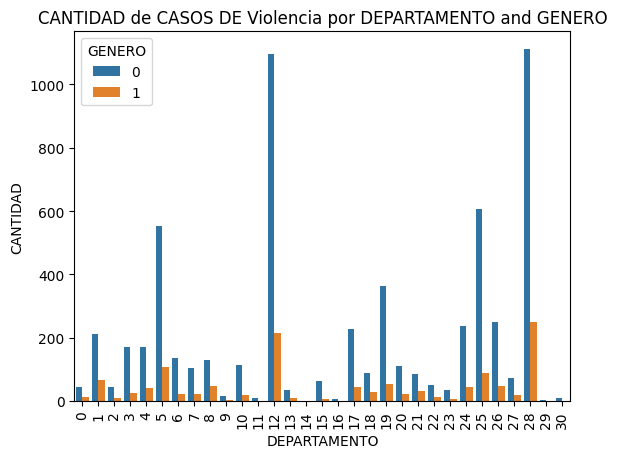

In [157]:
# Generemos un Gráfico de la cantidad de casos de Violencia agrupado por DEPARTAMENTO and GENERO
casos_agrupado_por_dep_gen = df.groupby(['DEPARTAMENTO', 'GENERO'])['CANTIDAD'].sum().reset_index()

# Create the plot
sns.barplot(x='DEPARTAMENTO', y='CANTIDAD', hue='GENERO', data=casos_agrupado_por_dep_gen)
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.title('CANTIDAD de CASOS DE Violencia por DEPARTAMENTO and GENERO')
plt.show()

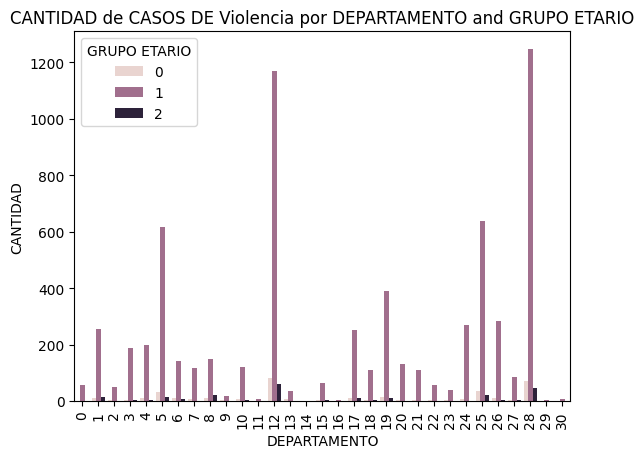

In [158]:
# Generemos un Gráfico de la cantidad de casos de Violencia agrupado por DEPARTAMENTO and GRUPO ETARIO
casos_agrupado_por_dep_gen = df.groupby(['DEPARTAMENTO', 'GRUPO ETARIO'])['CANTIDAD'].sum().reset_index()

# Create the plot
sns.barplot(x='DEPARTAMENTO', y='CANTIDAD', hue='GRUPO ETARIO', data=casos_agrupado_por_dep_gen)
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.title('CANTIDAD de CASOS DE Violencia por DEPARTAMENTO and GRUPO ETARIO')
plt.show()

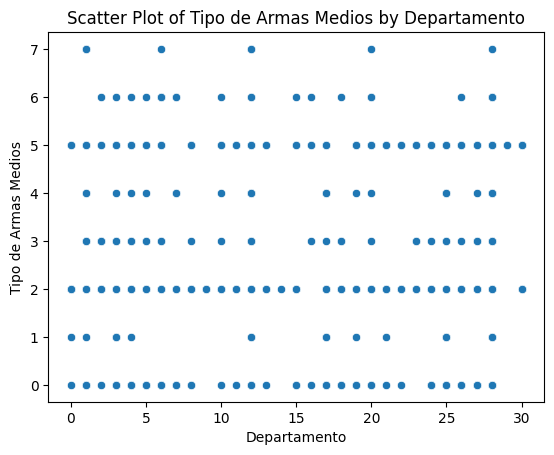

In [159]:
sns.scatterplot(x='DEPARTAMENTO', y='ARMAS MEDIOS', data=df)
plt.title('Scatter Plot of Tipo de Armas Medios by Departamento')
plt.xlabel('Departamento')
plt.ylabel('Tipo de Armas Medios')
plt.show()

# Conclusiones
Durante el desarrollo de esta actividad, nos enfocamos en evaluar el conjunto de datos (Dataframe), conocerlo y luego realizamos  transformaciones de Variable Categoricas a  variables Numericas usando Lab Enconder. Con estas transformaciones, podemos hacer ya analisis comparativos entre los valores numericos de las variables transformadas.

Tambien, sera posible transformar las variables a tráves de estandarización o normalización, para llevar los datos hacia un posible modelo matemático que describa los datos y permita hacer predicciones, que es lo que se busca con las transformaciones realizadas.